## part 1: y = -103  
## part 2: 圆心(205, -1) 半径102
## part 3: x = 307左右   
## part 4: 圆心(255,49),半径52
        #切于#102左右  y = 102
## part 5: 圆心(255, 149),半径48
## part 6: 直线 y = 196
## part 7: 圆心(355, 299),半径102
## part 8: y = 400.5
## part 9: 圆心(155, 349),半径52
## part 10: x = 102.5
## part 11: 圆心(55, 249) 半径48
## part 12: x = 7.25
## part 13 : 圆心(-45, 348) 半径52
## part 14: y = 400
## part 15: 圆心(-245, 298)  半径 102
## part 16: y = 196.2
## part 17: 圆心(-145, 149） 半径 48
## part 18: 圆心(-145, 49) 半径52 
## part 19: x = - 197
## part 20: 圆心(-95, -1)半径102

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style


In [2]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

In [6]:
%matplotlib qt
noiseless_MPC = np.load("./MPC_data/proposed_noiseless_normalMPC.npy")
plt.plot(noiseless_MPC[:,0], noiseless_MPC[:,1])
plt.xlabel("x/m")
plt.ylabel("y/m")
plt.title("test track")

Text(0.5, 1.0, 'test track')

In [7]:
noiseless_adaptiveMPC = np.load("./MPC_data/proposed_noiseless_adaptiveMPC.npy")
plt.plot(noiseless_adaptiveMPC[:,0], noiseless_adaptiveMPC[:,1])

In [8]:
noise_MPC = np.load("./MPC_data/proposed_noisy_normalMPC.npy")
plt.plot(noise_MPC[:,0], noise_MPC[:,1])

In [9]:
noise_adaptive = np.load("./MPC_data/proposed_noisy_adaptiveMPC2.npy")
plt.plot(noise_adaptive[:,0], noise_adaptive[:,1])

In [10]:
standard = np.load("./MPC_data/standard.npy")
plt.plot(standard[:,0], standard[:,1])

In [11]:
from math import *
def get_error(x, y):
    if x <= 55:
        x = 110 - x
    if -100<=x<=200 and -110<=y<=-90:
        return y - (-103)
    if 200<=x and y<=0:
        return sqrt((x-205)**2 + (y+1)**2) - 102
    if x >= 0 and 0<= y <= 50:
        return x - 307
    if x >= 255 and 50 <= y <= 110:
        return sqrt((x-255)**2 + (y-49)**2) - 52
    if 180<=x<=255 and 90<=y<=210:
        return sqrt((x-255)**2 + (y-149)**2) - 48
    if 255<=x<=350 and 190<=y<=210:
        return y - 196
    if x >= 350 and y >= 190:
        return sqrt((x-355)**2 + (y-299)**2) - 102
    if 155<=x<=350 and y >= 390:
        return y - 400
    if 100<=x<=155 and y >= 350:
        return sqrt((x-155)**2 + (y-349)**2) - 52
    if 90<=x<=110 and y >= 250:
        return x - 102.5
    if -5 <= x<= 105 and y <= 250 : 
        return sqrt((x-55)**2 + (y-249)**2) - 48

In [12]:
summing = 0
temp = noise_adaptive.copy()
errors = np.zeros_like(temp[:,0])
for i in range(len(temp[:,0])):
    error = get_error(temp[i,0], temp[i,1])
    if error is None:
        print(temp[i,0], temp[i,1])
    errors[i] = error
    summing += error **2
summing/(len(temp[:,0]))

0.2569438184847655

In [101]:
summing = 0
temp = noiseless_adaptiveMPC.copy()
errors = np.zeros(len(temp[:,0]))
for i in range(len(temp[:,0])):
    error = get_error(temp[i,0], temp[i,1])
    if error is None:
        print(temp[i,0], temp[i,1])
    summing += error **2
    errors[i] = error
summing/(len(temp[:,0]))

0.26547873379941944

In [14]:
summing = 0
temp = noise_MPC.copy()
for i in range(len(temp[:,0])):
    error = get_error(temp[i,0], temp[i,1])
    summing += error **2
summing/(len(temp[:,0]))

0.47064192364195995

In [15]:
summing = 0
temp = noiseless_MPC.copy()
for i in range(len(temp[:,0])):
    error = get_error(temp[i,0], temp[i,1])
    if error is None:
        print(temp[i,0], temp[i,1])
    summing += error **2
summing/(len(temp[:,0]))

0.6561374805407563

In [13]:
summing = 0
temp = standard.copy()
for i in range(len(temp[:,0])):
    error = get_error(temp[i,0], temp[i,1])
    if error is None:
        print(temp[i,0], temp[i,1])
    summing += error **2
summing/(len(temp[:,0]))

0.3057759212119352

In [29]:
start = 0
end = 200
plt.plot(noiseless_adaptiveMPC[start:end,0],noiseless_adaptiveMPC[start:end,1], 'b-')
plt.plot(noise_adaptive[start:end,0],noise_adaptive[start:end,1], 'c-')
plt.plot(noise_MPC[start:end,0],noise_MPC[start:end,1], 'g-')
plt.plot(noiseless_MPC[start:end,0],noiseless_MPC[start:end,1], 'y-')

plt.plot([45,120], [-103,-103],'r-')
plt.legend(["adaptiveMPC",'noise adaptiveMPC','MPC','noise MPC','expectation'])
plt.xlabel("x/m")
plt.ylabel("y/m")
plt.title("shift lane and straignt line")

Text(0.5, 1.0, 'shift lane and straignt line')

In [82]:
start = 750
end = 900

plt.plot(noiseless_adaptiveMPC[start:end,0],noiseless_adaptiveMPC[start:end,1], 'b-')
plt.plot(noise_adaptive[start:end,0],noise_adaptive[start:end,1], 'c-')
plt.plot(noiseless_MPC[start:end,0],noiseless_MPC[start:end,1], 'y-')
plt.plot(noise_MPC[start:end,0],noise_MPC[start:end,1], 'g-')
x = np.linspace(304,308,2000)
plt.plot(x, -np.sqrt(102.1**2 - (x-205)**2) -1.1, 'r-')
plt.plot([307.1, 307.1], [-1.2, 30], 'r-')
plt.legend(["adaptiveMPC",'noise adaptiveMPC','MPC','noise MPC','expectation'])
plt.xlabel("x/m")
plt.ylabel("y/m")
plt.title("circle to straight")

/home/owen/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


Text(0.5, 1.0, 'circle to straight')

In [94]:
start = 1000
end = 1350

plt.clf()
plt.plot(noiseless_adaptiveMPC[start:end,0],noiseless_adaptiveMPC[start:end,1], 'b-')
plt.plot(noise_adaptive[start:end,0],noise_adaptive[start:end,1], 'c-')
plt.plot(noiseless_MPC[start:end,0],noiseless_MPC[start:end,1], 'y-')
plt.plot(noise_MPC[start:end,0],noise_MPC[start:end,1], 'g-')

x = np.linspace(255,302,2000)
plt.plot(x, np.sqrt(52.1**2 - (x-255)**2) +50, 'r-')
x = np.linspace(200,260,2000)
plt.plot(x, -np.sqrt(48.1**2 - (x-255)**2) +150, 'r-')
plt.legend(["adaptiveMPC",'noise adaptiveMPC','MPC','noise MPC','expectation'])
plt.xlabel("x/m")
plt.ylabel("y/m")
plt.title("circle to circle")

/home/owen/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


Text(0.5, 1.0, 'circle to circle')

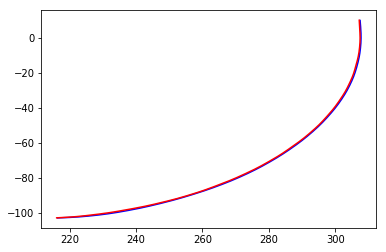

In [52]:
start = 450
end = 850
plt.plot(noiseless_MPC[start:end,0], noiseless_MPC[start:end,1], 'b-')
plt.plot(noiseless_adaptiveMPC[start:end,0], noiseless_adaptiveMPC[start:end,1],'r-')

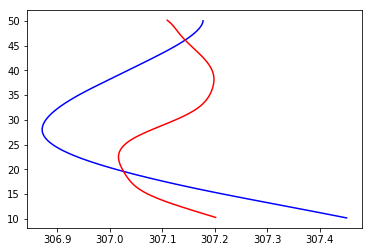

In [58]:
start = 850
end = 950
plt.plot(noiseless_MPC[start:end,0], noiseless_MPC[start:end,1], 'b-')
plt.plot(noiseless_adaptiveMPC[start:end,0], noiseless_adaptiveMPC[start:end,1],'r-')

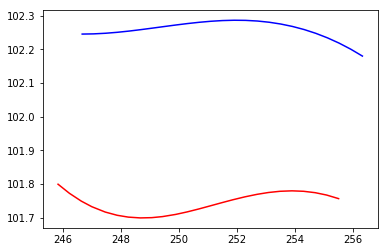

In [65]:
start = 1150
end = 1175
plt.plot(noiseless_MPC[start:end,0], noiseless_MPC[start:end,1], 'b-')
plt.plot(noiseless_adaptiveMPC[start:end,0], noiseless_adaptiveMPC[start:end,1],'r-')